In [1]:
import numpy as np
import matplotlib.pyplot as plt
import visualization
import os
from gta_math import points_to_homo, ndc_to_view, construct_proj_matrix, view_to_world, construct_view_matrix, is_entity_in_image
from visualization import load_depth, load_stencil, save_pointcloud_csv, bbox_from_string, draw3dbboxes, draw_one_entity_3dbbox
import progressbar
from joblib import Parallel, delayed
from configparser import ConfigParser
from PIL import Image
import pickle
import json
from datetime import timedelta, datetime, date
from matplotlib.dates import DateFormatter, DateFormatter, HourLocator
import glob

In [2]:
ini_file = "gta-postprocessing.ini"
visualization.multi_page = False
visualization.ini_file = ini_file

conn = visualization.get_connection_pooled()
cur = conn.cursor()

CONFIG = ConfigParser()
CONFIG.read(ini_file)
directory = r'D:\generic-dataset'

In [3]:
def get_base_name(name):
    return os.path.basename(os.path.splitext(name)[0])

pattern = '[0-9][0-9][0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9]-[0-9][0-9]-[0-9][0-9]--[0-9][0-9][0-9].jpg'
files = glob.glob(os.path.join(directory, pattern))
np.random.shuffle(files)

D:\generic-dataset\2018-03-07--16-03-59--928.jpg 2018-03-07--16-03-59--928
camera pos:  [780.429809570312, -1024.19104003906, 26.1076889038086]
2D bbox: [[ 134.62451727  546.61450521]
 [   0.          447.48006038]]


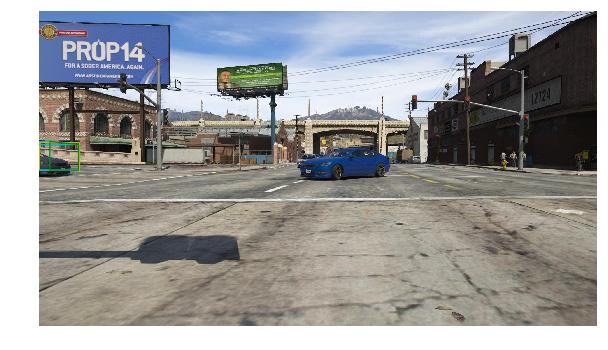

D:\generic-dataset\2018-03-30--09-05-00--883.jpg 2018-03-30--09-05-00--883
camera pos:  [1033.59375, 3627.39916992188, 32.8819770812988]
2D bbox: [[ 970.79337988  545.51570691]
 [ 947.3466777   528.74786086]]
2D bbox: [[ 704.3255925   602.73004732]
 [ 392.1821876   422.77710273]]
2D bbox: [[ 984.12874203  545.12891084]
 [ 958.53940863  528.07902105]]


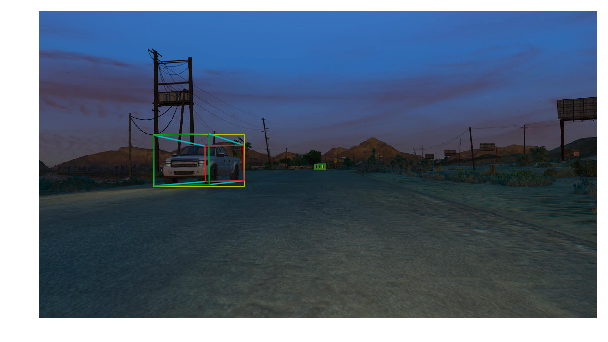

D:\generic-dataset\2018-03-30--06-32-49--439.jpg 2018-03-30--06-32-49--439
camera pos:  [1777.51745605469, 3932.8955078125, 34.3815116882324]
2D bbox: [[ 1307.87663047   572.8977465 ]
 [ 1235.23723799   480.38866981]]
2D bbox: [[ 1915.00052274   495.85336254]
 [ 1899.34197786   487.01291557]]


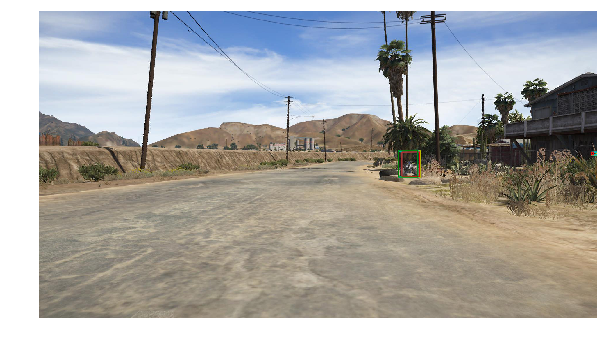

D:\generic-dataset\2018-03-30--01-11-44--819.jpg 2018-03-30--01-11-44--819
camera pos:  [503.844909667969, -1165.89147949219, 29.2709770202637]
2D bbox: [[ 854.23235507  552.53456465]
 [ 792.61345999  522.30473994]]
2D bbox: [[ 1272.18623417   674.38065667]
 [  962.44277983   460.74479866]]
2D bbox: [[ 1915.00052274  1053.00095147]
 [  734.44646748   296.80144548]]


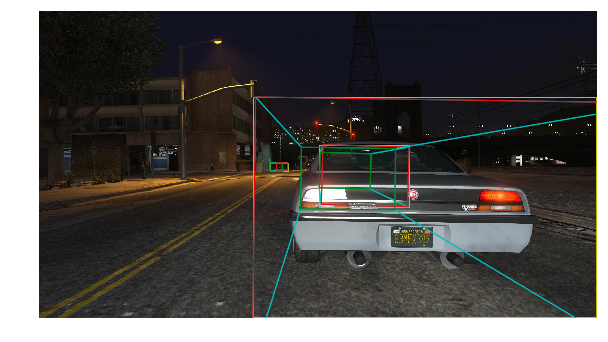

D:\generic-dataset\2018-03-07--18-36-22--669.jpg 2018-03-07--18-36-22--669
camera pos:  [-1067.69311523438, -603.208862304688, 17.7089500427246]
2D bbox: [[ 1915.00052274   432.54110459]
 [ 1900.15646697   420.6961354 ]]


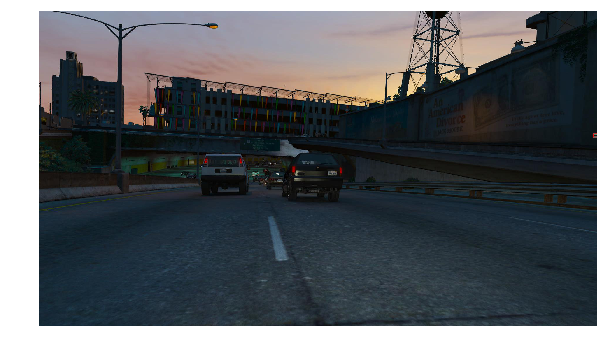

D:\generic-dataset\2018-03-30--01-31-55--873.jpg 2018-03-30--01-31-55--873
camera pos:  [481.862609863281, -1043.30993652344, 34.7218360900879]


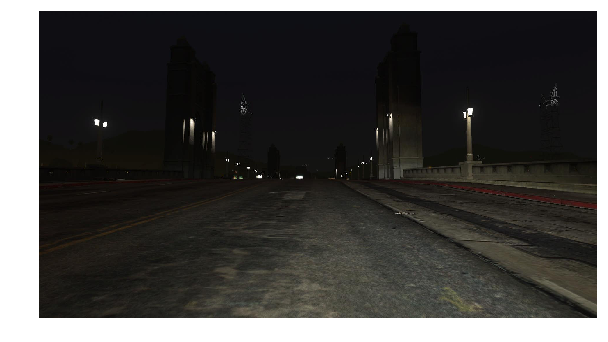

D:\generic-dataset\2018-03-07--15-49-21--487.jpg 2018-03-07--15-49-21--487
camera pos:  [792.9580078125, -1298.67614746094, 26.2539367675781]
2D bbox: [[  37.14233296  569.82559486]
 [   0.          506.30329838]]
2D bbox: [[ 1915.00052274   505.82215865]
 [ 1911.31565314   496.60214037]]


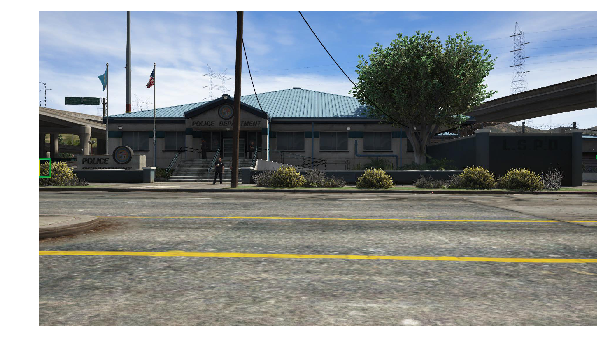

D:\generic-dataset\2018-03-30--08-11-11--714.jpg 2018-03-30--08-11-11--714
camera pos:  [1602.51977539062, 3732.94116210938, 34.6248321533203]
2D bbox: [[ 109.7291979   573.0565714 ]
 [   0.          528.35565673]]
2D bbox: [[ 958.14776647  540.73354665]
 [ 924.20138337  528.93253469]]


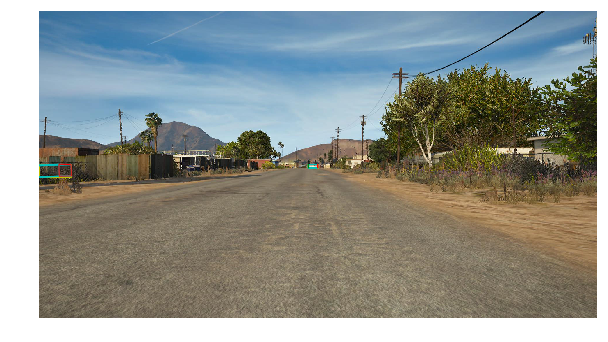

D:\generic-dataset\2018-03-30--03-00-47--970.jpg 2018-03-30--03-00-47--970
camera pos:  [1468.37316894531, -1055.83337402344, 55.5835189819336]
2D bbox: [[ 1002.76760611   629.66612996]
 [  770.36852697   451.86418045]]
2D bbox: [[ 876.38773122  573.87940762]
 [ 647.81132746  330.87670116]]
2D bbox: [[ 1083.40712373   541.809481  ]
 [ 1044.30751587   486.84835299]]
2D bbox: [[ 1302.8723993    581.55748319]
 [ 1129.37573711   468.22098746]]
2D bbox: [[ 843.16175795  613.3135459 ]
 [ 342.69982301  222.03698125]]


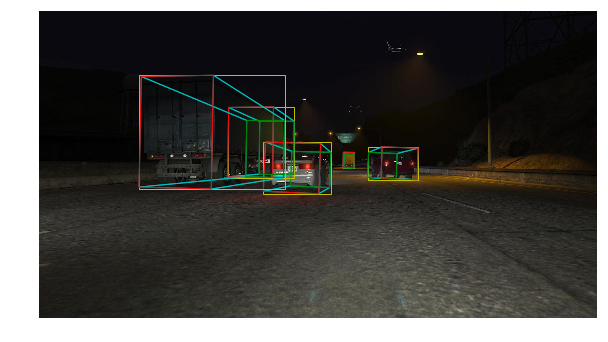

D:\generic-dataset\2018-03-30--10-22-53--920.jpg 2018-03-30--10-22-53--920
camera pos:  [1819.41418457031, 3784.82080078125, 33.7684440612793]
2D bbox: [[ 1915.00052274   502.09003435]
 [ 1909.15238134   489.50244872]]
2D bbox: [[ 640.3500563   545.39543126]
 [ 539.93467636  509.66017057]]


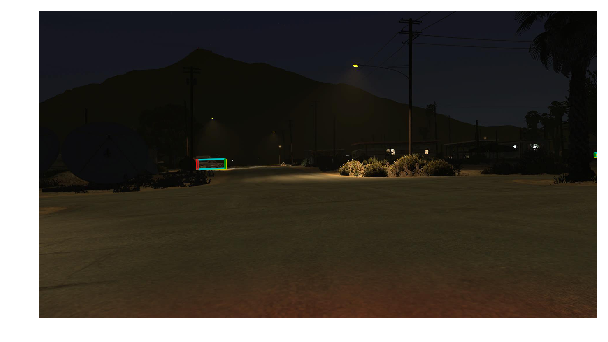

D:\generic-dataset\2018-03-30--03-53-00--375.jpg 2018-03-30--03-53-00--375
camera pos:  [2608.00561523438, 3067.7373046875, 46.7518539428711]
2D bbox: [[ 1915.00052274   863.73449254]
 [ 1732.98363764   544.41875344]]


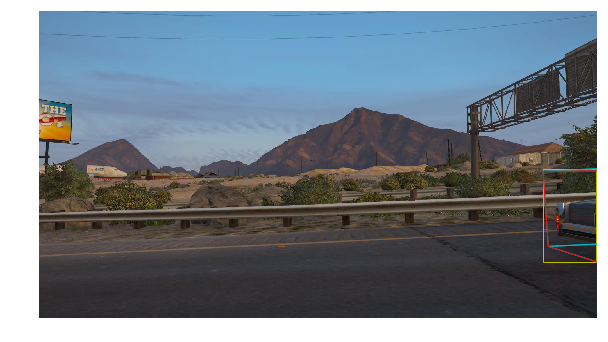

D:\generic-dataset\2018-03-30--06-23-12--507.jpg 2018-03-30--06-23-12--507
camera pos:  [1747.51684570312, 3845.63159179688, 35.0049209594727]


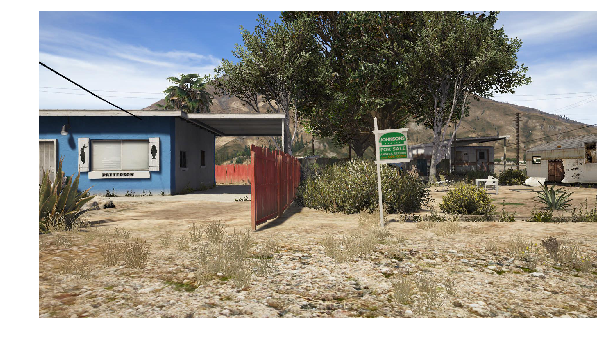

D:\generic-dataset\2018-03-30--06-27-39--662.jpg 2018-03-30--06-27-39--662
camera pos:  [1555.25244140625, 3746.26538085938, 34.6703300476074]
2D bbox: [[   1.06915174  538.92030168]
 [   0.          529.38627486]]
2D bbox: [[ 1048.76927771   518.82655107]
 [ 1039.46478294   511.64929182]]
2D bbox: [[ 1048.80077991   519.92710455]
 [ 1038.12086275   510.17589476]]


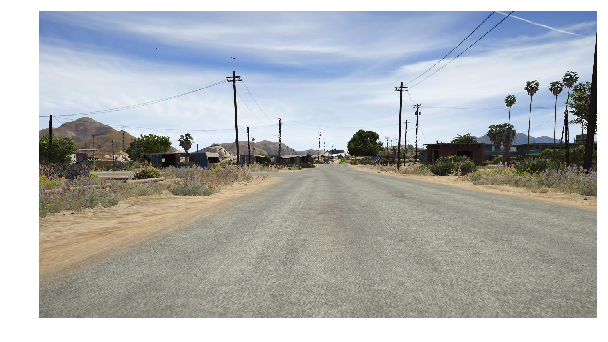

D:\generic-dataset\2018-03-07--16-53-52--405.jpg 2018-03-07--16-53-52--405
camera pos:  [713.571044921875, -1208.74621582031, 44.5765800476074]


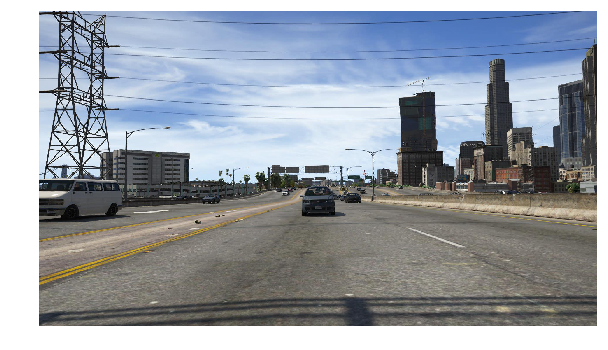

D:\generic-dataset\2018-03-07--18-01-07--474.jpg 2018-03-07--18-01-07--474
camera pos:  [1344.38549804688, -2361.904296875, 52.4123115539551]
2D bbox: [[  27.74245808  655.57248099]
 [   0.          629.02010804]]


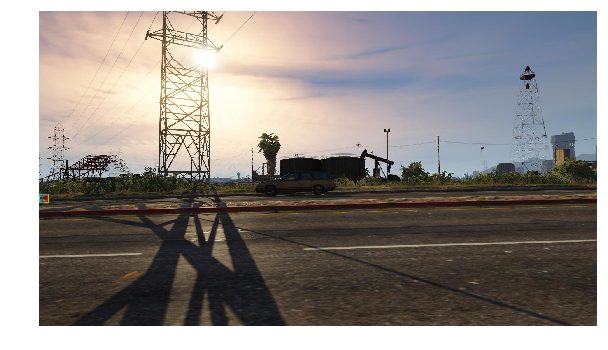

D:\generic-dataset\2018-03-30--09-36-52--107.jpg 2018-03-30--09-36-52--107
camera pos:  [909.955688476562, 3533.23364257812, 33.9822654724121]
2D bbox: [[ 911.16753924  559.36874541]
 [ 727.68423346  492.97379469]]


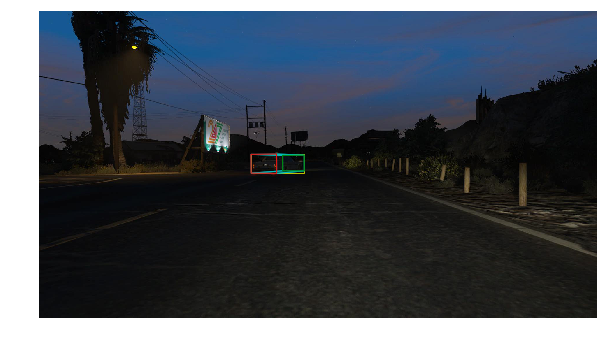

D:\generic-dataset\2018-03-30--09-26-28--864.jpg 2018-03-30--09-26-28--864
camera pos:  [558.880798339844, 3575.875, 32.8347473144531]
2D bbox: [[ 926.83660596  543.53629644]
 [ 890.28172992  518.76114676]]
2D bbox: [[ 600.17560097  738.45280648]
 [   0.          313.52941604]]


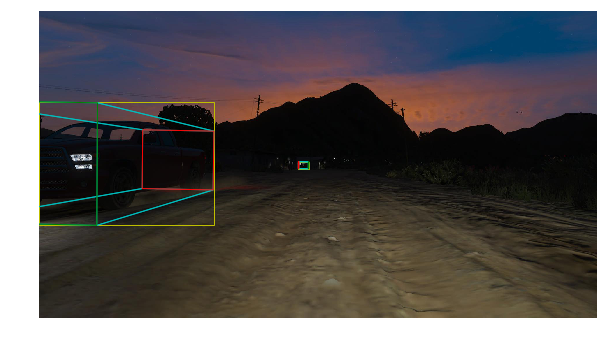

D:\generic-dataset\2018-03-30--03-40-38--713.jpg 2018-03-30--03-40-38--713
camera pos:  [2051.32006835938, 2587.12377929688, 54.1255340576172]
2D bbox: [[ 926.69606115  493.41156151]
 [ 900.729521    464.9268064 ]]
2D bbox: [[ 909.30256804  493.6148158 ]
 [ 883.8661868   468.16800916]]
2D bbox: [[ 873.1806193   492.72430709]
 [ 843.06309906  471.01941553]]
2D bbox: [[ 939.87014915  493.79359979]
 [ 913.38624592  468.56718346]]
2D bbox: [[ 1561.05701458   501.61667151]
 [ 1505.33843084   477.15037809]]
2D bbox: [[ 889.74666754  493.18053812]
 [ 873.56277605  483.35841036]]
2D bbox: [[ 877.76224471  492.44097489]
 [ 854.09992842  469.13113421]]
2D bbox: [[ 863.27652561  492.57000321]
 [ 848.82121419  483.82802263]]


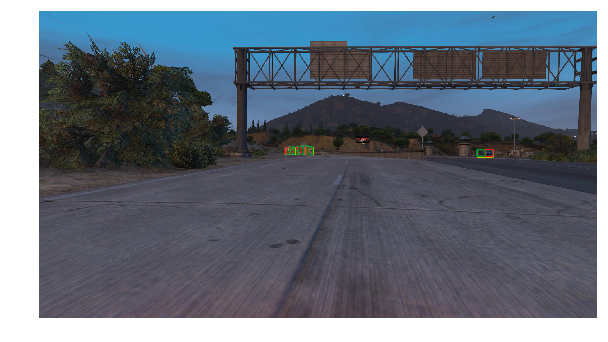

D:\generic-dataset\2018-03-07--15-59-28--012.jpg 2018-03-07--15-59-28--012
camera pos:  [797.472290039062, -1145.30981445312, 29.0408229827881]


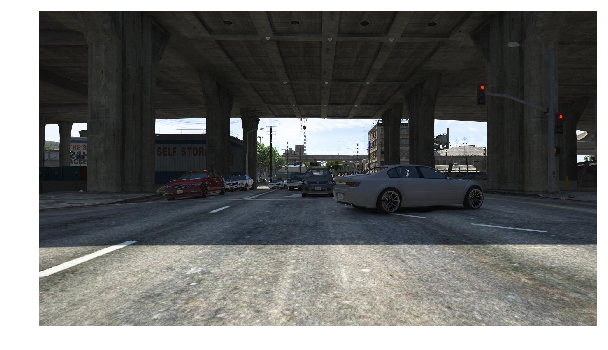

D:\generic-dataset\2018-03-30--02-49-47--922.jpg 2018-03-30--02-49-47--922
camera pos:  [997.047119140625, -928.710815429688, 30.8863830566406]
2D bbox: [[ 320.72134551  567.04482751]
 [  68.06447772  511.83371832]]
2D bbox: [[ 1868.16253533   546.64197826]
 [ 1708.14298525   504.24091458]]


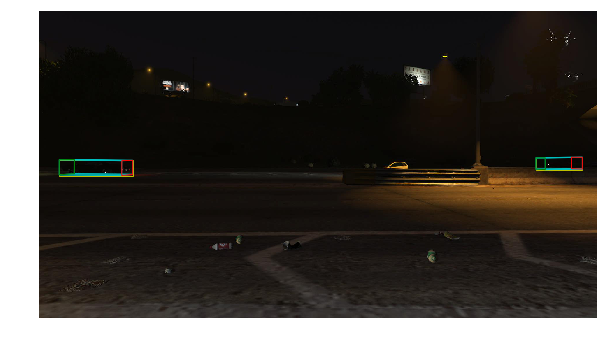

In [4]:
for file in files[260:280]:
    print(file, get_base_name(file))
    rgb_file = os.path.join(directory, '{}.jpg'.format(get_base_name(file)))
    depth_file = os.path.join(directory, '{}.png'.format(get_base_name(file)))
    if not os.path.exists(depth_file):
        depth_file = os.path.join(directory, '{}-depth.png'.format(get_base_name(file)))        
    json_file = os.path.join(directory, '{}.json'.format(get_base_name(file)))
    rgb = np.array(Image.open(rgb_file))
    depth = np.array(Image.open(depth_file))
    depth = depth / np.iinfo(np.uint16).max  # normalizing into NDC
    with open(json_file, mode='r') as f:
        data = json.load(f)
    #print(data)
    data['width'] = 1914  # not in jsons, but it is constant
    data['height'] = 1052  # not in jsons, but it is constant
    fig = plt.figure(figsize=(10, 7))
    draw3dbboxes(rgb, depth, data, fig)
    plt.show()
# todo: zrefactorovat, aby se do draw3dbboxes předával i stencil